# Data Visualization Assignment

Visualizing population data from the Gapminder dataset using matplotlib and seaborn for Brazil, France, Japan, Kenya, and United States.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Define file paths
file_paths = {
    'Brazil': 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-bra--age--gender--year.csv',
    'France': 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-fra--age--gender--year.csv',
    'Japan': 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-jpn--age--gender--year.csv',
    'Kenya': 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-ken--age--gender--year.csv',
    'USA': 'ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv'
}

# Load data into a dictionary of DataFrames
data = {country: pd.read_csv(path) for country, path in file_paths.items()}


## Part 1: Matplotlib Visualizations

### 1.1 Line Plot - Total population over time

This plot shows the total population over time for Brazil, France, Japan, Kenya, and United States.

In [8]:
# Calculate total population per year for each country
yearly_totals = {country: df.groupby('year')['population'].sum() for country, df in data.items()}

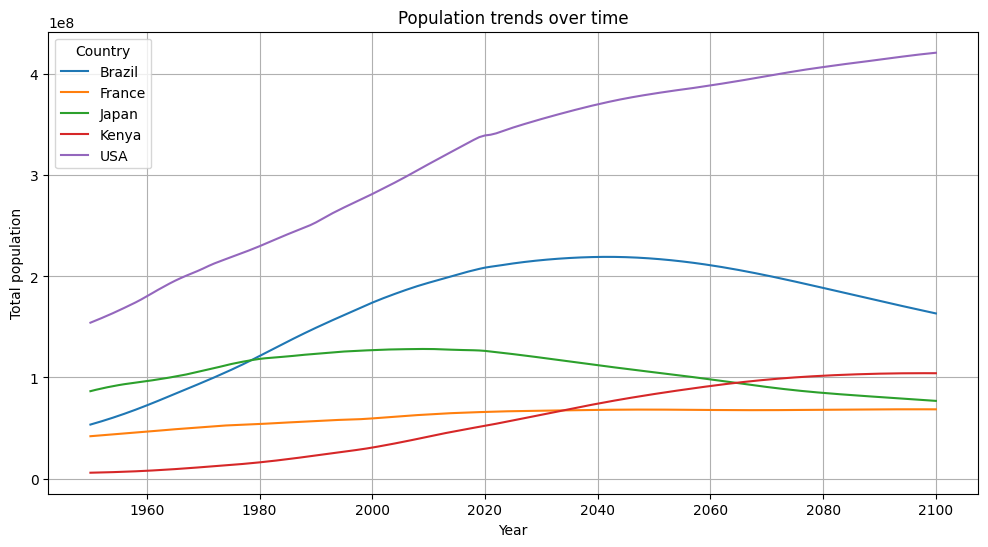

In [9]:
# Plot population trends over time
plt.figure(figsize=(12, 6))
for country, yearly_data in yearly_totals.items():
    plt.plot(yearly_data.index, yearly_data.values, label=country)

plt.title('Population trends over time')
plt.xlabel('Year')
plt.ylabel('Total population')
plt.legend(title='Country')
plt.grid(True)
plt.show()

### 1.2 Stacked Bar Chart - Age distribution comparison

This chart compares age distributions for 1950, 1985, and 2020 for Brazil.

## Part 2: Seaborn Visualizations

### 2.1 Heatmap - Population distribution across age groups and countries

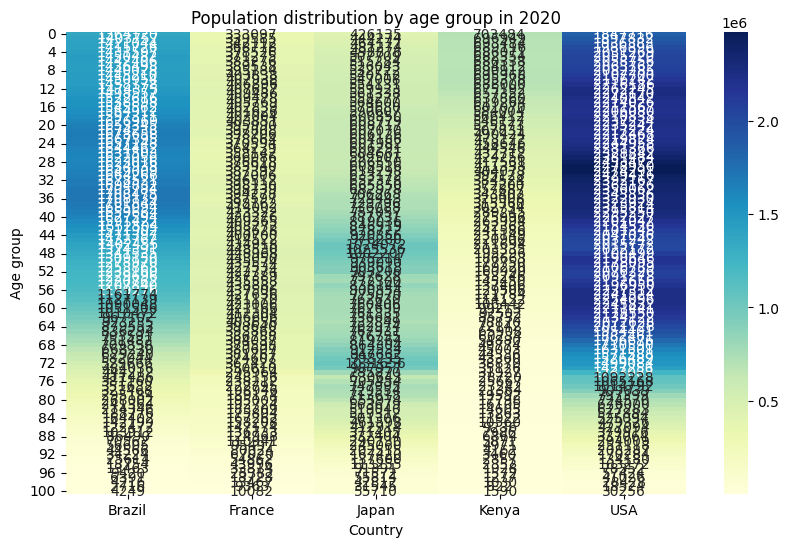

In [10]:
# Prepare data for heatmap for the year 2020
year = 2020
data_year = pd.concat([df[df['year'] == year].assign(country=country) for country, df in data.items()])
heatmap_data = data_year.pivot_table(values='population', index='age', columns='country')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='.0f')
plt.title(f'Population distribution by age group in {year}')
plt.xlabel('Country')
plt.ylabel('Age group')
plt.show()

### 2.2 Violin Plot - Age distribution comparison between Japan and United States in 2020

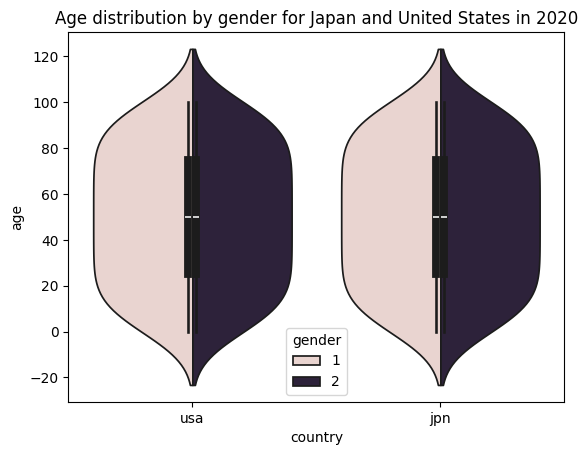

In [11]:
# Filter data for USA and Japan for the year 2020
japan_data = data['Japan'][data['Japan']['year'] == 2020]
usa_data = data['USA'][data['USA']['year'] == 2020]
combined_data = pd.concat([usa_data, japan_data]).assign(country=lambda df: df['country'].replace({'Japan': 'Japan', 'USA': 'United States'}))

# Plot violin plot
sns.violinplot(data=combined_data, x='country', y='age', hue='gender', split=True)
plt.title('Age distribution by gender for Japan and United States in 2020')
plt.show()

### 2.3 Pairplot - Population metrics comparison across selected countries